In [26]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sma

In [2]:
# Dataframe for the average wage per sector

GICS_sectors = ['Energy',
               'Materials',
               'Consumer Staples',
               'Consumer Discretionary',
               'Industrials',
               'Health Care',
               'Real Estate',
               'Financials',
               'Information Technology',
               'Communication Services',
               'Utilities']
wages = [106790,51410,46280,67230,49140,63710,58530,88270,105280,47820,64760]
data = {'Sector':GICS_sectors,'Average_wage':wages}
average_wage_df = pd.DataFrame.from_dict(data)
average_wage_df

,Sector,Average_wage
0,Energy,106790
1,Materials,51410
2,Consumer Staples,46280
3,Consumer Discretionary,67230
4,Industrials,49140
5,Health Care,63710
6,Real Estate,58530
7,Financials,88270
8,Information Technology,105280
9,Communication Services,47820


In [3]:
# Using Pandas to read in the csv file containing the parental leave data
parental_leave_df = pd.read_csv(Path("Parent_Leave_Cleaned.csv"))

# print the first five rows of the dataframe
parental_leave_df.head()


,Company,Industry,Sector,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
0,Epsilon,Advertising,Communication Services,6.0,6.0,6.0,6.0
1,The Walt Disney Company,Arts & Entertainment,Communication Services,5.0,4.0,4.5,4.0
2,Guild Education,Business Services: Other,Industrials,14.0,0.0,8.0,4.0
3,WeWork,Business Services: Other,Real Estate,14.0,2.0,16.0,4.0
4,Randstad USA,Business Services: Staffing & Outsourcing,Industrials,5.0,7.0,0.0,0.0


(array([1, 2, 3, 4]),
 [Text(1, 0, 'Paid Maternity Leave'),
  Text(2, 0, 'Unpaid Maternity Leave'),
  Text(3, 0, 'Paid Paternity Leave'),
  Text(4, 0, 'Unpaid Paternity Leave')])

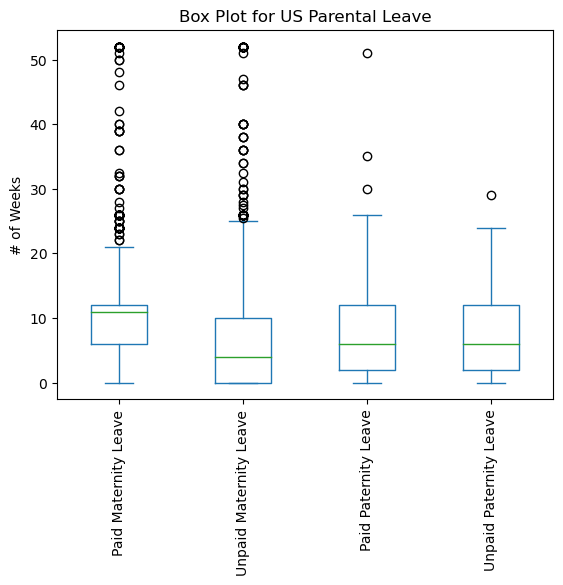

In [5]:
# Creating a box plot for all 4 types of parental leave 

parental_leave_df.loc[:,['Paid Maternity Leave',
       'Unpaid Maternity Leave', 'Paid Paternity Leave',
       'Unpaid Paternity Leave']].plot(kind="box", title=f"Box Plot for US Parental Leave", ylabel="# of Weeks")
plt.xticks(rotation=90)

<Axes: title={'center': 'Average Unpaid Maternity Leave by Sector'}, xlabel='Sector', ylabel='# of Weeks'>

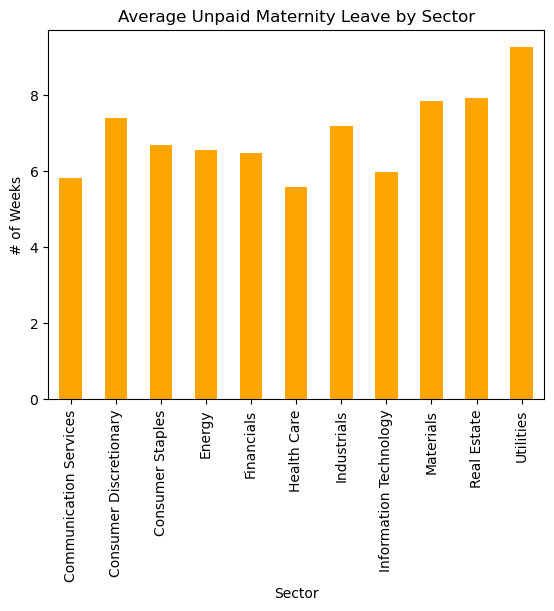

In [7]:
# fucntion to create bar graph of the average parental leave by sector with type of parental leave as the input

def bar(column, df):
    average_by_sector = df.groupby('Sector')[column].mean()
    return average_by_sector.plot(kind="bar", title=f"Average {column} by Sector", color="orange", ylabel="# of Weeks")

bar("Unpaid Maternity Leave", parental_leave_df)

<Axes: title={'center': 'Average Wage by Sector'}, xlabel='Sector', ylabel='in USD ($)'>

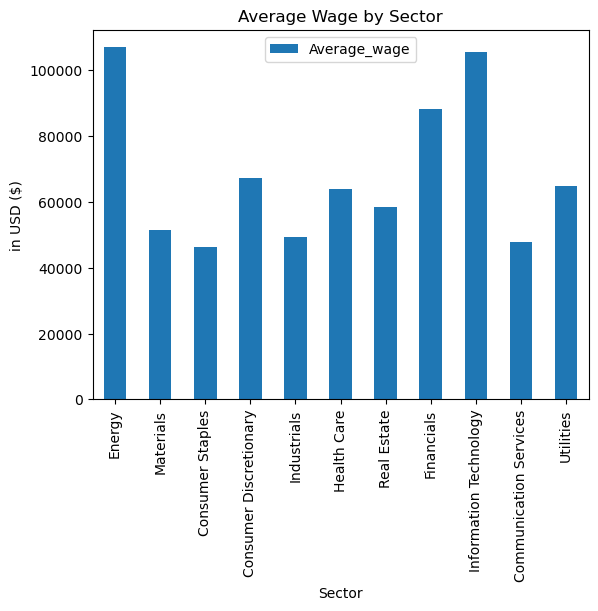

In [8]:
# bar graph of the average wage by sector

average_wage_df.plot(kind="bar", x="Sector", title="Average Wage by Sector", ylabel = "in USD ($)") 

In [9]:

# Dictionary containg the data for percentage of female employees by sector

gender_breakdown = {'Energy':.154,
                    'Materials':.280,
                    'Consumer Staples':.346,
                    'Consumer Discretionary':.492,
                    'Industrials':.256,
                    'Health Care':.776,
                    'Real Estate':.491,
                    'Financials':.473,
                    'Information Technology':.393,
                    'Communication Services':.544,
                    'Utilities':.247}
gender_ratios = gender_breakdown.values()
gender_sectors = gender_breakdown.keys()

# Dictionary converted to a dataframe
df_gender = pd.DataFrame(gender_sectors, gender_ratios)
df_gender = df_gender.reset_index()
df_gender = df_gender.rename(columns={'index':'Female %',0:'Sector'}).set_index('Sector')
df_gender

,Female %
Sector,
Energy,0.154
Materials,0.280
Consumer Staples,0.346
Consumer Discretionary,0.492
Industrials,0.256
Health Care,0.776
Real Estate,0.491
Financials,0.473
Information Technology,0.393


In [11]:
# Creating dataframe which aggregates the mean parental leave by sector and by type of parental leave

leave_by_sector_df = parental_leave_df.groupby(['Sector']).mean()

leave_by_sector_df

/var/folders/18/lw9x6y592m39tw9gsm89jzx40000gn/T/ipykernel_58691/3604476824.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  leave_by_sector_df = parental_leave_df.groupby(['Sector']).mean()


,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
Sector,,,,
Communication Services,11.405844,5.822917,7.500000,6.666667
Consumer Discretionary,10.288274,7.403915,5.242424,18.000000
Consumer Staples,10.458333,6.689394,7.666667,8.400000
Energy,9.785714,6.545455,2.000000,8.000000
Financials,11.926778,6.473214,8.650943,4.222222
Health Care,8.382979,5.587786,4.458333,4.285714
Industrials,9.791667,7.194581,6.173077,6.818182
Information Technology,12.812937,5.979705,9.475410,10.333333
Materials,9.528571,7.838710,4.400000,8.000000


In [12]:
# Setting the Sector as the index for average wage Dataframe
wages_df = average_wage_df.set_index('Sector')
wages_df

,Average_wage
Sector,
Energy,106790
Materials,51410
Consumer Staples,46280
Consumer Discretionary,67230
Industrials,49140
Health Care,63710
Real Estate,58530
Financials,88270
Information Technology,105280


In [13]:
# Joning the wages_df dataframe as well as the gender_df dataframe with the leave_by_sector dataframe

joined_df = leave_by_sector_df.join(wages_df).join(df_gender)

joined_df

,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Average_wage,Female %
Sector,,,,,,
Communication Services,11.405844,5.822917,7.500000,6.666667,47820,0.544
Consumer Discretionary,10.288274,7.403915,5.242424,18.000000,67230,0.492
Consumer Staples,10.458333,6.689394,7.666667,8.400000,46280,0.346
Energy,9.785714,6.545455,2.000000,8.000000,106790,0.154
Financials,11.926778,6.473214,8.650943,4.222222,88270,0.473
Health Care,8.382979,5.587786,4.458333,4.285714,63710,0.776
Industrials,9.791667,7.194581,6.173077,6.818182,49140,0.256
Information Technology,12.812937,5.979705,9.475410,10.333333,105280,0.393
Materials,9.528571,7.838710,4.400000,8.000000,51410,0.280


<Axes: >

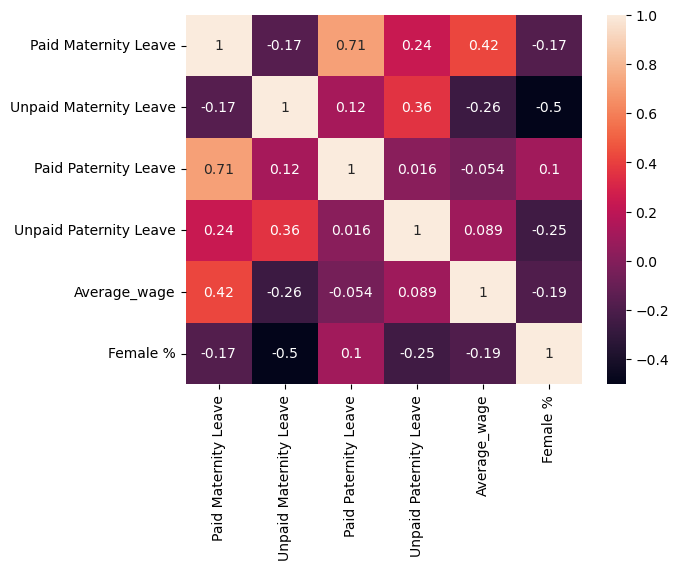

In [14]:
# function to create heatmap using Seaborn library 

def correlation(df):
    corr = df.corr()
    return sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values, annot=True)
# calling fucntion with the joined_df
correlation(joined_df)


coefficient of determination: 0.2521451951873952


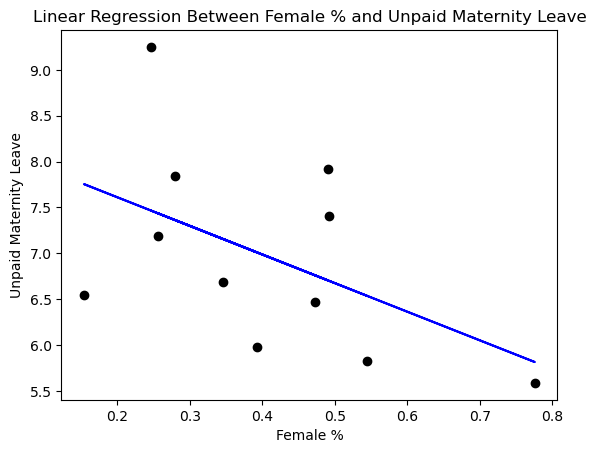

In [25]:
# fucntion which uses the sklearn library to create a linear regression model and scatter plot for two variables

def linreg(df,x,y):
    array = df[x].to_numpy().reshape(-1, 1)
    array2 = df[y].to_numpy().reshape(-1, 1)
    # Creates linear regression model
    model = LinearRegression().fit(array, array2)
    # Calculates coefficient of determination
    r_sq = model.score(array, array2)
    # Predict y outputs based on linear regression model
    y_pred = model.predict(array)
    # Plot the actual datapoints and the line resulting from linear regression
    plt.scatter(array, array2, color="black")
    plt.plot(array, y_pred, color="blue")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"Linear Regression Between {x} and {y}")
    return print(f"coefficient of determination: {r_sq}")

# Calling the function

linreg(joined_df,"Female %","Unpaid Maternity Leave") 